In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colormaps
from matplotlib.colors import Normalize
from matplotlib.path import Path
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 14,
})

## Description du problème

On se propose d'étudier le comportement vibratoire d'un athlète positionné au bout de plongeoir.

![Description du problème](pictures/plongeur.png)

Le plongeur de masse $m$ est situé, à l'instant initial $t=0s$, en bout de plongeoir, sans vitesse, et à une altitude ne déformant pas le plongeoir.

**Rappels** :

* La présence du plongeur est modélisée à l'aide d'une masse ponctuelle située en bout de plongeoir ;
* Le plongeoir est en bois, modélisé comme un matériau homogène élastique isotrope ;
* Le comportement inertiel du plongeoir est négligé ;
* L'action de la pesanteur est prise en compte.


### Données

Considérons les données quantitatives suivantes :

| $L$    | $b$      | $h$     | $E$       | $R_e$     | $m$      | $g$                     |
|:------:|:--------:|:-------:|:---------:|:---------:|:--------:|:-----------------------:|
| $2\,m$ | $40\,cm$ | $4\,cm$ | $10\,GPa$ | $30\,MPa$ | $70\,kg$ | $9.806\,m\cdot{}s^{-2}$ |


In [2]:
# Board
L = 2.00 #    Length [m]
b = 0.40 #     Width [m]
h = 0.04 # Thickness [m]
E = 10.0E9 # Young's modulus [Pa]
I = b*h**3.0 / 12.0 # Second moment of area [m^4]
Re= 30.0 # Yield stress [MPa]

# Mass
m = 70.0 # Mass [kg]
g =  9.806 # Gravity [m.s^-2]

## Expression de la réponse temporelle

### Equation du mouvement

L'équation du mouvement du plongeur peut être obtenu en exprimant l'équilibre dynamique du plongeur. Le plongeur est soumis à :
* l'action de la pensanteur,
* l'action du plongeoir.

Le plongeur étant modélisé comme une masse ponctuelle, dont le déplacement est exprimé par $u_y^M(t)$, le principe fondamental de la dynamique (ou la deuxième loi de Newton) donne :
$$
    m\ddot{u}_y^M(t) = F(\mathrm{pesanteur}\to\mathrm{plongeur}, t) + F(\mathrm{plongeoir}\to\mathrm{plongeur}, t),\quad\forall{}t.
$$

L'effort imposé par la pesanteur est formulé comme :
$$
    F(\mathrm{pesanteur}\to\mathrm{plongeur}, t) = - mg.
$$

Pour l'action du plongeoir sur le plongeoir, nous faisons appel à des résultats de ``résistance des matériaux''. En particulier, si nous nous plaçons du point de vue du plongeoir, celui se trouve encastré à une de ses extrémités, et soumis à un effort ponctuelle à l'autre extrémité.

![Le plongeoir vu comme un problème de RDM](pictures/plongeoirRDM.png)

Le déplacement vertical (ou bien la flèche) le long de la poutre est exprimée dans ce cas de chargement par :
$$
    u_y(t, x) = F(\mathrm{plongeur}\to\mathrm{plongeoir}, t)\frac{x^2}{6EI_z}(3L-x),\quad\forall{}x\in[0,L].
$$
En exploitant le fait que $u_y^M(t) = u_y(t, x=L)$ et $F(\mathrm{plongeoir}\to\mathrm{plongeur}, t) = -F(\mathrm{plongeur}\to\mathrm{plongeoir}, t)$, 
nous pouvons identifier la raideur du plongeoir :
$$
\begin{align*}
    &u_y^M(t) = u_y(t, x=L) = F(\mathrm{plongeur}\to\mathrm{plongeoir}, t)\frac{L^3}{3EI_z} \\
    \Leftrightarrow\quad&
    F(\mathrm{plongeoir}\to\mathrm{plongeur}, t) = -k u_y^M(t),
\end{align*}
$$
où la raideur est donnée par :
$$
    k = \frac{3EI_z}{L^3} = \frac{E b h^3}{6L^3}.
$$

Finalement, nous en déduisons l'équation du mouvement du plongeur :
$$
    \boxed{
        m\ddot{u}_y^M(t) + k{u}_y^M(t) = -mg,\quad\forall{}t.
    }
$$

### Oscillateur linéaire

Nous reconnaissons une équation du mouvement associée à un oscillateur linéaire conservatif $(m,k)$ où l'action de la gravité est prise en compte. Ceci peut être vu comme un cas où d'un oscillateur linéaire où la pesanteur n'intervient pas (voir cours) :


Ainsi, notre équation du mouvement peut être réinterprétée comme :
$$
\begin{equation}
    \boxed{
        \left\{
            \begin{array}{l}
        m \ddot{u}_{\mathrm{dyn}}(t) + ku_{\mathrm{dyn}}(t) = 0 \\[5pt]
        u_{\mathrm{dyn}}(t) = u_y^M(t) - u_{\mathrm{stat}} \\[2pt]
        u_{\mathrm{stat}} = -mg/k
    \end{array}\right.,\quad\forall{}t.
        }
\end{equation}
$$

### Conditions initiales

Les conditions initiales (ce qu'il se passe à $t=0$) sont, dans notre problème :
$$
    \boxed{u_y^M(t = 0) = 0,}\quad\mathrm{et}\quad{}\boxed{\dot{u}_y^M(t = 0) = 0.}
$$
Le plongeoir n'est pas déformé et le plongeur n'a pas de vitesse initiale.

En utilisant la décomposition $u_y^M(t) = u_{\mathrm{stat}} + u_{\mathrm{dyn}}(t) $, 
nous en déduisons les conditions initiales pour le terme dynamique :
$$
   u_{\mathrm{dyn}}(t=0) = -u_{\mathrm{stat}},
   \quad\mathrm{et}\quad{}
   \dot{u}_{\mathrm{dyn}}(t = 0) = 0.
$$

### Solution et réponse temporelle

En nous appuyant sur les résultats du cours, la solution à l'équation du mouvement vérifiant les conditions initiales est donnée par :
$$
    u_{\mathrm{dyn}}(t) = -u_{\mathrm{stat}}\cos(\omega_0 t),
$$
où $\omega_0$ est la pulsation propre de notre système, s'exprimant par : $\omega_0 = \sqrt{k/m}$.

En regroupant tous les résultats présentés, nous obtenons :
$$
\begin{align*}
    u_y^M(t) &= u_{\mathrm{stat}}\big(1 - \cos(\omega_0 t)\big) \\
    \mathrm{où}:\quad
    & u_{\mathrm{stat}} = -mg/k, \\
    & k = \frac{3EI_z}{L^3},\quad I_z = \frac{bh^3}{12},\\
    & \omega_0 = \sqrt{\dfrac{k}{m}}.
\end{align*}
$$


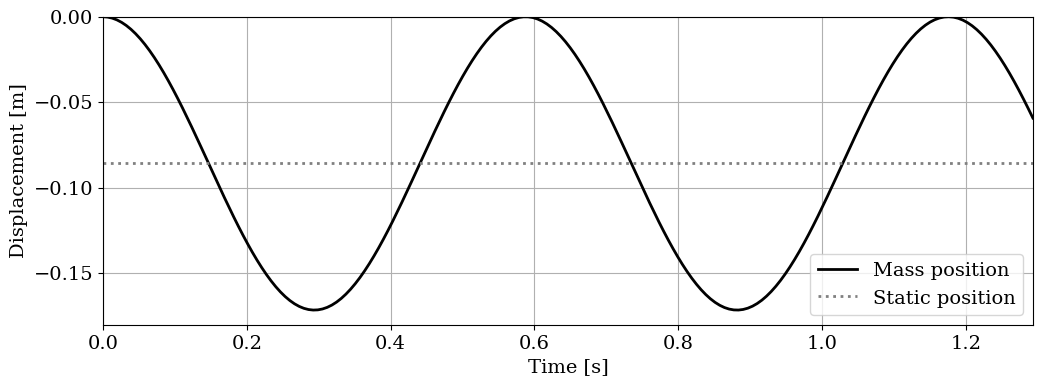

Natural frequency: 1.701 Hz.
Static displacement: -0.086 m.


In [3]:
k = 3*E*I / L**3 # stiffness [N.m^-1]

w0 = np.sqrt(k/m)
f0 = w0/2.0/np.pi
T0 = 1/f0
ustat = -m*g/k


fig, ax = plt.subplots(1,1,figsize=(12,4))

t = np.linspace(0,2.2*T0,200)
def uyM(t:float):
    return ustat - ustat*np.cos(w0*t)
u = uyM(t)
ax.plot(
    t,u,
    label = "Mass position",
    color="black", linestyle="solid", linewidth=2)
ax.plot(
    t,ustat*np.ones(t.size),
    label = "Static position",
    color="gray", linestyle="dotted", linewidth=2)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Displacement [m]')
ax.legend()
ax.grid(visible=True)
ax.set_xlim(t.min(),t.max())
ax.set_ylim(1.05*u.min(),u.max())

plt.show()

print("Natural frequency: {:.3f} Hz.".format(f0))
print("Static displacement: {:.3f} m.".format(ustat))

## Bilan énergétique

Trois types d'énergie sont en jeu :

* L'énergie cinétique car le plongeur de masse $m$ est en mouvement,
* L'énergie de déformation car le plongeoir se déforme,
* L'énergie potentielle de pesanteur car l'altitude du plongeur varie.

Les expressions mathématiques de ces énergies sont respectivement les suivantes :
$$
\begin{align*}
    \mathcal{E}_{\mathrm{c}}(t) &= \frac{1}{2}m({\dot{u}_y^M}(t))^2, \\
    \mathcal{W}_{\mathrm{int}}(t) &= \frac{1}{2}k({{u}_y^M}(t))^2, \\
    \mathcal{E}_{\mathrm{p}}(t) &= mg({{u}_y^M}(t) - u_{\mathrm{stat}}).
\end{align*}
$$

Le système étant conservatif ici, et en oscillation libre (pas d'apport d'énergie au système au cours du temps), l'énergie totale est constante du temps et égale à l'énergie totale initiale :
$$
    \mathcal{W}_{\mathrm{tot}}(t)
        =
        \mathcal{E}_{\mathrm{c}}(t)
        +
        \mathcal{W}_{\mathrm{int}}(t)
        +
        \mathcal{E}_{\mathrm{p}}(t)
        ~~=~~
        \mathcal{W}_{\mathrm{tot}}^0
        =
        \mathcal{E}_{\mathrm{c}}^0
        +
        \mathcal{W}_{\mathrm{int}}^0
        +
        \mathcal{E}_{\mathrm{p}}^0.
$$


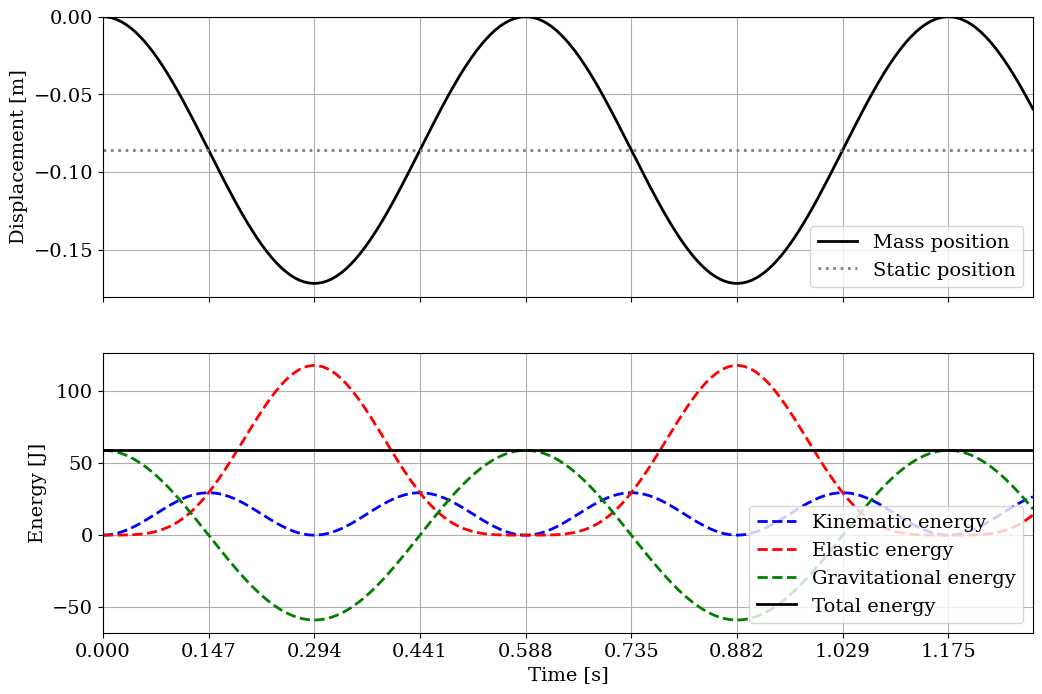

In [4]:
# Energie cinétique
v = w0*ustat * np.sin(w0*t) # Vitesse du plongeur
Ec = 0.5 * m * v**2

# Energie de déformation
Wint = 0.5 * k * u**2

# Energie potentielle de pesanteur
Ep = m*g*(u - ustat)

# Energie totale
Etot = Ec + Wint + Ep

# Plot
fig, axs = plt.subplots(2,1,sharex=True,figsize=(12,8))
ax = axs[0]
ax.plot(
    t,u,
    label = "Mass position",
    color="black", linestyle="solid", linewidth=2)
ax.plot(
    t,ustat*np.ones(t.size),
    label = "Static position",
    color="gray", linestyle="dotted", linewidth=2)
ax.set_ylabel('Displacement [m]')
ax.legend(loc="lower right")
ax.grid(visible=True)
ax.set_ylim(1.05*u.min(),u.max())

ax = axs[1]
ax.plot(
    t,Ec,
    label = "Kinematic energy",
    color="blue", linestyle="dashed", linewidth=2)
ax.plot(
    t,Wint,
    label = "Elastic energy",
    color="red", linestyle="dashed", linewidth=2)
ax.plot(
    t,Ep,
    label = "Gravitational energy",
    color="green", linestyle="dashed", linewidth=2)
ax.plot(
    t,Etot,
    label = "Total energy",
    color="black", linestyle="solid", linewidth=2)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Energy [J]')
ax.legend(loc="lower right")
ax.grid(visible=True)
ax.set_xlim(t.min(),t.max())
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25*T0))

## Efforts internes dans le plongeoir

### Moment de flexion

Il est intéressant de regarder ce qu'il se passe du point de vue du plongeoir. Comme évoqué, le plongeoir est encastré d'un côté, et de l'autre à un effort ponctuel varie au cours du temps (car le déplacement du plongeur varie).

La réponse temporelle du moment de flexion dans la poutre (le plongeoir) s'écrit comme :
$$
\begin{split}
    M_{z}(t,x) 
    &= (L-x) F(\mathrm{plongeur}\to{}\mathrm{plongeoir}, t) \\
    &= (L-x) k u_y^M(t) \\
    &= (L-x) k u_{\mathrm{stat}}\big(1 - \cos(\omega_0 t)\big) \\
    &=  M_{z}^{\mathrm{stat}}(x) \big(1 - \cos(\omega_0 t)\big)
\end{split}
$$
où $M_{z}^{\mathrm{stat}}(x)$ est le moment de flexion à l'équilibre statique, *i.e.* : 
$M_{z}^{\mathrm{stat}}(x) = (L-x) k u_{\mathrm{stat}} = -(L-x)mg$.

Le moment de flexion dynamique peut être vu comme le moment de flexion statique multiplié par un coefficient d'amplification dynamique, ici égal à $M_{z}(t,x) / M_{z}^{\mathrm{stat}}(x) = 1 - \cos(\omega_0 t)$. Cette amplification dynamique varie entre $0$ et $2$.
Le cas critique pour le plongeoir est lorsque ce coefficient dynamique est égal à $2$, c'est-à-dire lorsque le plongeur est à l'altitude la plus basse (égale à $2u_{\mathrm{stat}}$).

Aussi, le moment de flexion est maximal à l'encastrement, c'est-à-dire lorsque $x=0$ :
$$
    M_{z,\mathrm{max}}(t) 
    = M_{z}(t,x=0) 
    = Lk u_y^M(t) 
    = M_{z,\mathrm{max}}^{\mathrm{stat}}\big(1 - \cos(\omega_0 t)\big)
    = -mgL\big(1 - \cos(\omega_0 t)\big).
$$

### Contrainte normale

Le plongeoir est en flexion simple. Nous pouvons utiliser la relation issue des hypothèses d'Euler-Bernoulli liant le moment de flexion à la contrainte normale dans le plongeoir :
$$
    \sigma_{xx}(t,x,y,z) = -y\frac{M_z(t,x)}{I_z},
    \quad\forall{}x\in[0,L], \forall{}y\in[-\frac{h}{2},\frac{h}{2}], \forall{}z\in[-\frac{b}{2},\frac{b}{2}].
$$

La contrainte est maximale au niveau de l'encastrement, et sur les peaux extérieurs, c'est-à-dire lorsque $x=0$ et $y = \pm{h}/{2}$. La contrainte normale est constante suivant la largeur, son expression ne dépend pas de $z$ ici.
En d'autres termes, nous avons :
$$
\begin{split}
    \sigma_{xx,\max{}}(t) 
    &= \sigma_{xx}(t,x=0,y=h/2,z=0) \\
    &= -\frac{h}{2}\frac{1}{I_z}M_{z,\mathrm{max}}(t) \\
    &= \frac{6mgL}{bh^2}\big(1 - \cos(\omega_0 t)\big).
\end{split}
$$

De même que pour le moment de flexion, la contrainte normale dynamique peut être vue comme la contrainte maximale statique multipliée par un coefficient d'amplification dynamique.

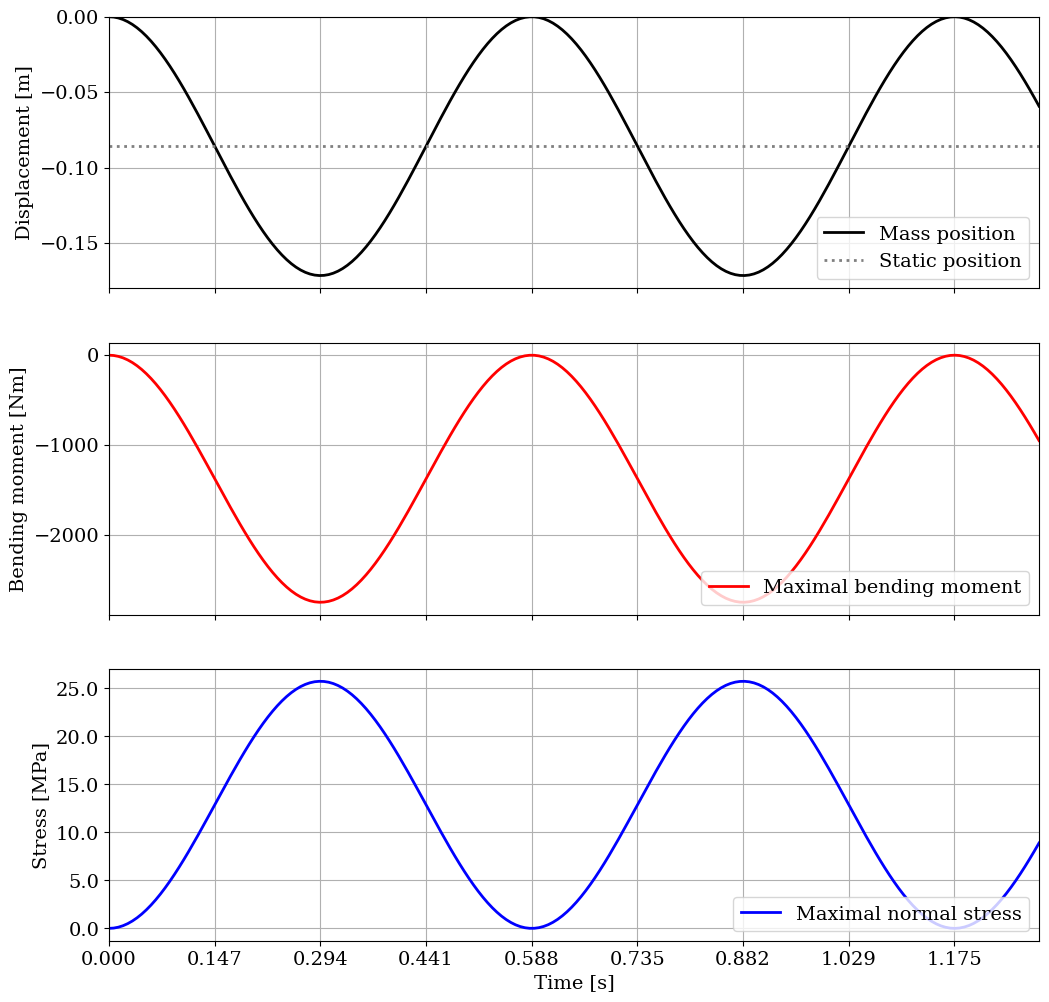

In [5]:
def Mzmax(t:float):
    return L*k*uyM(t)

def Smax(t):
    return -0.5*h*Mzmax(t)/I

fig, axs = plt.subplots(3,1,sharex=True,figsize=(12,12))
ax = axs[0]
ax.plot(
    t,u,
    label = "Mass position",
    color="black", linestyle="solid", linewidth=2)
ax.plot(
    t,ustat*np.ones(t.size),
    label = "Static position",
    color="gray", linestyle="dotted", linewidth=2)
ax.set_ylabel('Displacement [m]')
ax.legend(loc="lower right")
ax.grid(visible=True)
ax.set_ylim(1.05*u.min(),u.max())

ax = axs[1]
ax.plot(
    t,Mzmax(t),
    label = "Maximal bending moment",
    color="red", linestyle="solid", linewidth=2)
ax.set_ylabel('Bending moment [Nm]')
ax.legend(loc="lower right")
ax.grid(visible=True)

ax = axs[2]
ax.plot(
    t,Smax(t),
    label = "Maximal normal stress",
    color="blue", linestyle="solid", linewidth=2)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Stress [MPa]')
ax.yaxis.set_major_formatter(lambda x, pos: str(x*1e-6))
ax.legend(loc="lower right")
ax.grid(visible=True)
ax.set_xlim(t.min(),t.max())
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25*T0))


### Cas critique

La masse maximale admissible par le plongeoir dans la même configuration est définie par la limite élastique du matériau le composant : nous ne souhaitons pas que la contrainte maximale atteigne cette valeur. Autrement dit, nous voulons qu'à tout temps $t$ la relation suivante soit vérifiée :
$$
    \sigma_{xx,\max{}}(t) < R_e, \forall{}t.
$$


En d'autres termes, la masse critique $m_{\mathrm{c}}$ est définie par la relation :
$$
    \frac{6m_{\mathrm{c}}gL}{bh^2}2 = R_e,
    \quad\Rightarrow\quad
    \boxed{
        m_{\mathrm{c}} = R_e \frac{bh^2}{12gL}.
    }
$$

Si l'on considère qu'un athlète ayant cette masse critique se présente sur le plongeoir (dans la configuration initiale considérée ici), la contrainte normale atteindra la limite élastique à une demi-période propre (cf. graphe évolution de la contrainte normale maximale au cours du temps), soit :
$$
    \boxed{
        T_{\mathrm{c}} = \pi\sqrt{\frac{m_{\mathrm{c}}}{k}}.
    }
$$

In [6]:
mcritique = Re*b*h**2/(12.0*g*L)
Tcritique = np.pi*np.sqrt(mcritique/k)

print("Masse critique: {0:.2f} kg".format(mcritique))
print("Temps critique: {0:.3f} s".format(Tcritique))

Masse critique: 0.00 kg
Temps critique: 0.000 s


## Cas amorti

### Réponse temporelle

En réalité, le plongeur ne va pas osciller à l'infini, sans s'arrêter. L'énergie initiale va se dissiper et le plongeur va converger vers la position d'équilibre statique.

Equation du mouvement de l'athlète avec amortissement visqueux s'écrit :
$$
    \boxed{
        m\ddot{u}^{\mathrm{dyn}}(t) + c\dot{u}_y^M(t) + k{u}_y^M(t) = -mg,\quad\forall{}t.
    }
$$
Les conditions initiales sont les mêmes que pour le cas conservatif, soient :
$$
    \boxed{u_y^M(t = 0) = 0,}\quad\mathrm{et}\quad{}\boxed{\dot{u}_y^M(t = 0) = 0.}
$$

La solution générale de cette équation différentielle du second ordre est de la forme :
$$
    u_y^M(t) = \left(A\cos(\omega_d t) + B\sin(\omega_d t) \right)\exp(-\zeta\omega_0 t) + u_{\mathrm{stat}},
$$
où :
* $\omega_d = \omega_0\sqrt{1-\zeta^2}$ est la pulsation propre apparente,
* $\zeta = c/(2\sqrt{km})$ est le taux d'amortissement du système.


En prenant en compte les conditions initiales, nous obtenons l'expression de la réponse temporelle pour la cas dissipatif :
$$
\boxed{
    u_y^M(t) = u_{\mathrm{stat}}\left[1-\left(\cos(\omega_d t) + \frac{\zeta\omega_0}{\omega_d}\sin(\omega_d t) \right)\exp(-\zeta\omega_0 t)\right]
}
$$

### Méthode du décrément logarithmique

Il nous reste à identifier la valeur du taux d'amortissement à partir des observations expérimentales disant ``*qu'au bout de 10 oscillations, l'amplitude des vibrations devient négligeable ($\approx{}1\,cm$)*''. Autrement dit, nous avons :
$$
    |u(t=0)| = |u_{\mathrm{stat}}|
    \quad\mathrm{et}\quad
    |u(t=10T_d)| \approx 0.01\,m,
$$
où $T_d$ est la période propre apparente, et $|u(t)|$ dénote l'amplitude des oscillations à l'instant $t$.

On applique la méthode du décrément logarithmique (cf. cours), permettant d'obtenir la valeur du taux d'amortissement :
$$
    \boxed{
            \zeta
            =
            \frac{\delta}{\sqrt{4\pi^2 + \delta^2}},
            ~~
            \delta
            =
            \frac{1}{n}\ln\Big(\frac{|u(t)|}{|u(t+nT_d)|}\Big)
            % \frac{1}{\wo{}nT_d} \ln\Big(\frac{|u(t)|}{|u(t+nT_d)|}\Big)
            }
$$

Ici, cela donne :
$$
    \delta
    =
    \frac{1}{10}\ln\Big(\frac{|u(0)|}{|u(10T_d)|}\Big)
    =
    \frac{1}{10}\ln\Big(\frac{|u_{\mathrm{stat}}|}{0.01}\Big).
$$

In [7]:
ratioU =  np.abs(ustat) / 0.01
delta = 0.1 * np.log(ratioU)
zeta = delta / np.sqrt(4.0*np.pi**2 + delta**2)
c = 2 * zeta * np.sqrt(k*m)

print("Taux d'amortissement : {0:.3f}".format(zeta))


Taux d'amortissement : 0.034


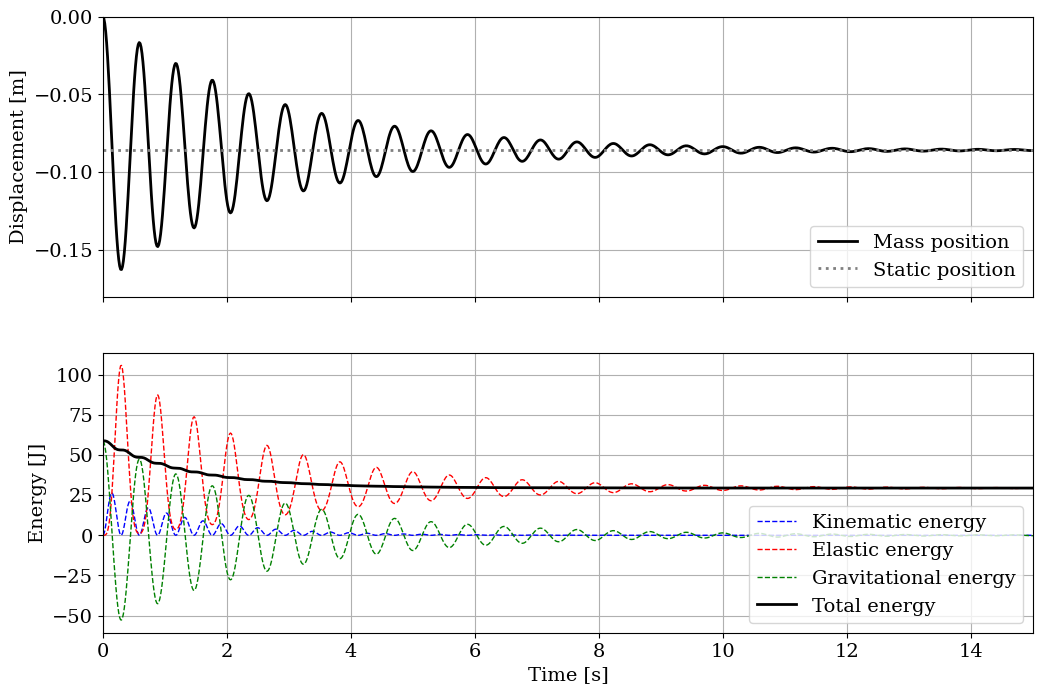

In [8]:
t2 = np.linspace(0,15,1000)

wd = w0 * np.sqrt(1.0 - zeta**2)

def uyMdissipatif(t:float):
    return ustat - ustat*(np.cos(wd*t) + zeta*w0/wd*np.sin(wd*t)) * np.exp(-zeta*w0*t)
def vyMdissipatif(t:float):
    v  = - ustat*(-wd * np.sin(wd*t) + zeta*w0*np.cos(wd*t)) * np.exp(-zeta*w0*t)
    v += - ustat*(np.cos(wd*t) + zeta*w0/wd*np.sin(wd*t)) * np.exp(-zeta*w0*t) * (-zeta*w0)
    return v


u2 = uyMdissipatif(t2)
v2 = vyMdissipatif(t2)
Ec2 = 0.5 * m * v2**2

Wint2 = 0.5 * k * u2**2

Ep2 = m*g*(u2 - ustat)

Etot2 = Ec2 + Wint2 + Ep2

fig, axs = plt.subplots(2,1,sharex=True,figsize=(12,8))
ax = axs[0]
ax.plot(
    t2,u2,
    label = "Mass position",
    color="black", linestyle="solid", linewidth=2)
ax.plot(
    t2,ustat*np.ones(t2.size),
    label = "Static position",
    color="gray", linestyle="dotted", linewidth=2)
ax.set_ylabel('Displacement [m]')
ax.legend(loc="lower right")
ax.grid(visible=True)
ax.set_ylim(1.05*u.min(),u.max())

ax = axs[1]
ax.plot(
    t2,Ec2,
    label = "Kinematic energy",
    color="blue", linestyle="dashed", linewidth=1)
ax.plot(
    t2,Wint2,
    label = "Elastic energy",
    color="red", linestyle="dashed", linewidth=1)
ax.plot(
    t2,Ep2,
    label = "Gravitational energy",
    color="green", linestyle="dashed", linewidth=1)
ax.plot(
    t2,Etot2,
    label = "Total energy",
    color="black", linestyle="solid", linewidth=2)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Energy [J]')
ax.legend(loc="lower right")
ax.grid(visible=True)
ax.set_xlim(t2.min(),t2.max())

plt.show()
